

# PyCaret Binary Classification Tutorial



# Installation



In [ ]:
pip install pycaret[full]

In [ ]:
# check installed version
import pycaret
pycaret.__version__

'3.3.2'

#  Quick start

PyCaret’s Classification Module is a supervised machine learning module that is used for classifying elements into groups. The goal is to predict the categorical class labels which are discrete and unordered.

Some common use cases include predicting customer default (Yes or No), predicting customer churn (customer will leave or stay), the disease found (positive or negative).

This module can be used for binary or multiclass problems. It provides several pre-processing features that prepare the data for modeling through the setup function. It has over 18 ready-to-use algorithms and several plots to analyze the performance of trained models.

A typical workflow in PyCaret consist of following 5 steps in this order:

## **Setup** ➡️ **Compare Models** ➡️ **Analyze Model** ➡️ **Prediction** ➡️ **Save Model**

In [ ]:
# loading sample dataset from pycaret dataset module
from pycaret.datasets import get_data
data = get_data('employee')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1


## Setup
This function initializes the training environment and creates the transformation pipeline. Setup function must be called before executing any other function in PyCaret. It only has two required parameters i.e. `data` and `target`. All the other parameters are optional.

In [ ]:
# import pycaret classification and init setup
from pycaret.classification import *
s = setup(data, target ='left', session_id = 123)

,Description,Value
0,Session id,123
1,Target,left
2,Target type,Binary
3,Original data shape,"(14999, 10)"
4,Transformed data shape,"(14999, 21)"
5,Transformed train set shape,"(10499, 21)"
6,Transformed test set shape,"(4500, 21)"
7,Numeric features,7
8,Categorical features,2
9,Preprocess,True


Once the setup has been successfully executed it shows the information grid containing experiment level information.

- **Session id:**  A pseudo-random number distributed as a seed in all functions for later reproducibility. If no `session_id` is passed, a random number is automatically generated that is distributed to all functions.<br/>
<br/>
- **Target type:**  Binary, Multiclass, or Regression. The Target type is automatically detected. <br/>
<br/>
- **Label Encoding:**  When the Target variable is of type string (i.e. 'Yes' or 'No') instead of 1 or 0, it automatically encodes the label into 1 and 0 and displays the mapping (0 : No, 1 : Yes) for reference. In this tutorial, no label encoding is required since the target variable is of numeric type. <br/>
<br/>
- **Original data shape:**  Shape of the original data prior to any transformations. <br/>
<br/>
- **Transformed train set shape :**  Shape of transformed train set <br/>
<br/>
- **Transformed test set shape :**  Shape of transformed test set <br/>
<br/>
- **Numeric features :**  The number of features considered as numerical. <br/>
<br/>
- **Categorical features :**  The number of features considered as categorical. <br/>

PyCaret has two set of API's that you can work with. (1) Functional (as seen above) and (2) Object Oriented API.

With Object Oriented API instead of executing functions directly you will import a class and execute methods of class.

In [ ]:
# import ClassificationExperiment and init the class
from pycaret.classification import ClassificationExperiment
exp = ClassificationExperiment()

In [ ]:
# check the type of exp
type(exp)

pycaret.classification.oop.ClassificationExperiment

In [ ]:
# init setup on exp
exp.setup(data, target = 'left', session_id = 123)

,Description,Value
0,Session id,123
1,Target,left
2,Target type,Binary
3,Original data shape,"(14999, 10)"
4,Transformed data shape,"(14999, 21)"
5,Transformed train set shape,"(10499, 21)"
6,Transformed test set shape,"(4500, 21)"
7,Numeric features,7
8,Categorical features,2
9,Preprocess,True


You can use any of the two method i.e. Functional or OOP and even switch back and forth between two set of API's. The choice of method will not impact the results and has been tested for consistency.

## Compare Models

This function trains and evaluates the performance of all the estimators available in the model library using cross-validation. The output of this function is a scoring grid with average cross-validated scores. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [ ]:
# compare baseline models
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9881,0.9909,0.9588,0.9910,0.9746,0.9668,0.9671,1.0650
xgboost,Extreme Gradient Boosting,0.9860,0.9926,0.9604,0.9804,0.9703,0.9611,0.9612,0.2690
lightgbm,Light Gradient Boosting Machine,0.9857,0.9932,0.9532,0.9864,0.9695,0.9601,0.9604,1.0030
et,Extra Trees Classifier,0.9843,0.9903,0.9504,0.9831,0.9664,0.9562,0.9565,1.0190
catboost,CatBoost Classifier,0.9839,0.9921,0.9488,0.9831,0.9656,0.9551,0.9554,5.9700
gbc,Gradient Boosting Classifier,0.9767,0.9890,0.9332,0.9677,0.9501,0.9349,0.9352,1.2440
dt,Decision Tree Classifier,0.9745,0.9694,0.9596,0.9351,0.9471,0.9303,0.9305,0.1400
ada,Ada Boost Classifier,0.9589,0.9834,0.9080,0.9184,0.9131,0.8862,0.8862,0.4880
knn,K Neighbors Classifier,0.9351,0.9696,0.9216,0.8264,0.8713,0.8281,0.8304,0.7610
qda,Quadratic Discriminant Analysis,0.8740,0.9149,0.8012,0.7165,0.7529,0.6693,0.6741,0.1320


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [ ]:
# compare models using OOP
exp.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9881,0.9909,0.9588,0.9910,0.9746,0.9668,0.9671,1.0850
xgboost,Extreme Gradient Boosting,0.9860,0.9926,0.9604,0.9804,0.9703,0.9611,0.9612,0.3850
lightgbm,Light Gradient Boosting Machine,0.9857,0.9932,0.9532,0.9864,0.9695,0.9601,0.9604,0.6870
et,Extra Trees Classifier,0.9843,0.9903,0.9504,0.9831,0.9664,0.9562,0.9565,0.9140
catboost,CatBoost Classifier,0.9839,0.9921,0.9488,0.9831,0.9656,0.9551,0.9554,5.6840
gbc,Gradient Boosting Classifier,0.9767,0.9890,0.9332,0.9677,0.9501,0.9349,0.9352,1.2320
dt,Decision Tree Classifier,0.9745,0.9694,0.9596,0.9351,0.9471,0.9303,0.9305,0.2740
ada,Ada Boost Classifier,0.9589,0.9834,0.9080,0.9184,0.9131,0.8862,0.8862,0.4160
knn,K Neighbors Classifier,0.9351,0.9696,0.9216,0.8264,0.8713,0.8281,0.8304,0.2710
qda,Quadratic Discriminant Analysis,0.8740,0.9149,0.8012,0.7165,0.7529,0.6693,0.6741,0.1320


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

Notice that the output between functional and OOP API is consistent. Rest of the functions in this notebook will only be shown using functional API only.

## Analyze Model

You can use the `plot_model` function to analyzes the performance of a trained model on the test set. It may require re-training the model in certain cases.

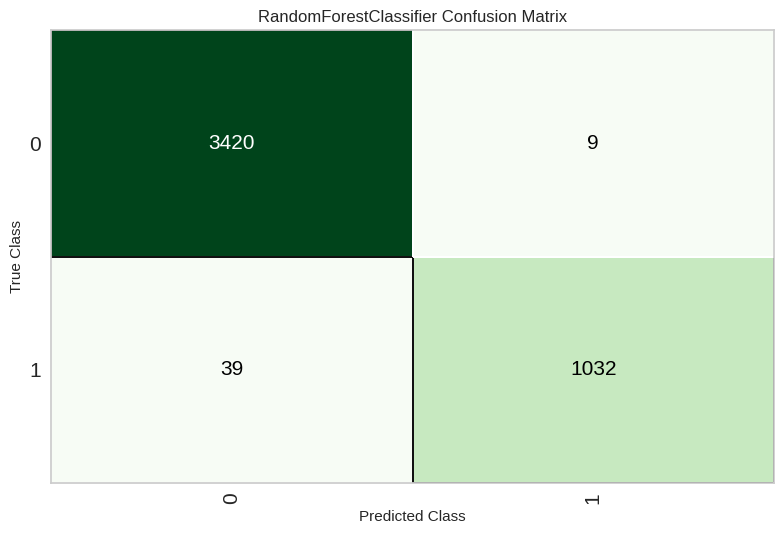

In [ ]:
# plot confusion matrix
plot_model(best, plot = 'confusion_matrix')

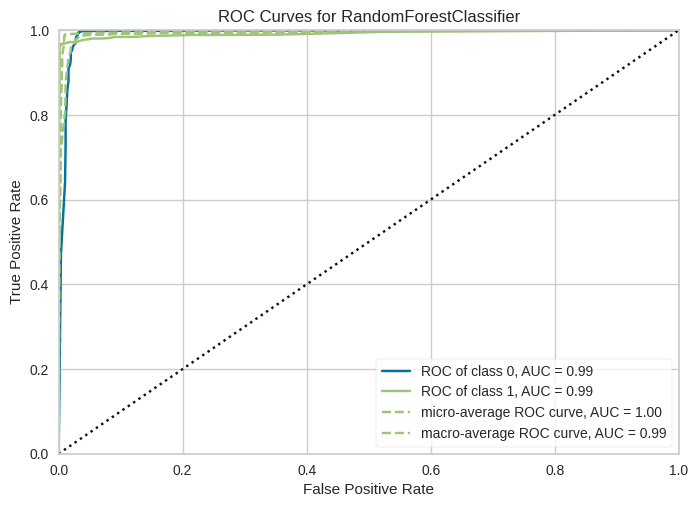

In [ ]:
# plot AUC
plot_model(best, plot = 'auc')

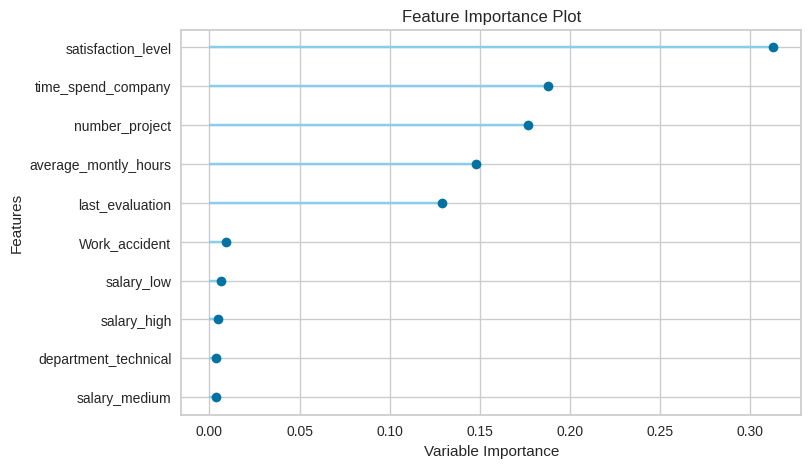

In [ ]:
# plot feature importance
plot_model(best, plot = 'feature')

In [ ]:
# check docstring to see available plots
# help(plot_model)

An alternate to `plot_model` function is `evaluate_model`. It can only be used in Notebook since it uses ipywidget.

In [ ]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

___

## Prediction
The `predict_model` function returns `prediction_label` and `prediction_score` (probability of the predicted class) as new columns in dataframe. When data is `None` (default), it uses the test set (created during the setup function) for scoring.

In [ ]:
# predict on test set
holdout_pred = predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9893,0.9920,0.9636,0.9914,0.9773,0.9703,0.9705


In [ ]:
# show predictions df
holdout_pred.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left,prediction_label,prediction_score
2149,0.68,0.46,4,143,3,0,0,sales,low,0,0,0.97
12549,0.41,0.47,2,138,3,0,0,sales,low,1,1,1.00
3563,0.85,0.89,4,251,2,0,0,support,low,0,0,1.00
6496,0.86,0.87,5,156,4,0,0,sales,low,0,0,0.85
7712,0.60,0.86,6,272,4,0,0,technical,low,0,0,0.72


The same function works for predicting the labels on unseen dataset. Let's create a copy of original data and drop the `Class variable`. We can then use the new data frame without labels for scoring.

In [ ]:
# copy data and drop Class variable

new_data = data.copy()
new_data.drop('left', axis=1, inplace=True)
new_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,0,sales,low
1,0.80,0.86,5,262,6,0,0,sales,medium
2,0.11,0.88,7,272,4,0,0,sales,medium
3,0.72,0.87,5,223,5,0,0,sales,low
4,0.37,0.52,2,159,3,0,0,sales,low


In [ ]:
# predict model on new_data
predictions = predict_model(best, data = new_data)
predictions.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,prediction_label,prediction_score
0,0.38,0.53,2,157,3,0,0,sales,low,1,1.00
1,0.80,0.86,5,262,6,0,0,sales,medium,1,0.99
2,0.11,0.88,7,272,4,0,0,sales,medium,1,1.00
3,0.72,0.87,5,223,5,0,0,sales,low,1,0.97
4,0.37,0.52,2,159,3,0,0,sales,low,1,1.00


## Save Model

Finally, you can save the entire pipeline on disk for later use, using pycaret's `save_model` function.

In [ ]:
# save pipeline
save_model(best, 'my_first_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['satisfaction_level',
                                              'last_evaluation',
                                              'number_project',
                                              'average_montly_hours',
                                              'time_spend_company',
                                              'Work_accident',
                                              'promotion_last_5years'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               miss...
 

In [ ]:
# load pipeline
loaded_best_pipeline = load_model('my_first_pipeline')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['satisfaction_level',
                                             'last_evaluation',
                                             'number_project',
                                             'average_montly_hours',
                                             'time_spend_company',
                                             'Work_accident',
                                             'promotion_last_5years'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='sqrt',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        monotonic_cst=None, n_estimators=100,
                                        n_jobs=-1, oob_score=False,
                                        random_state=123, verbose=0,
                                        warm_start=False))],
         verbose=False)

## ✅ Save / Load Experiment
This function saves all the experiment variables on disk, allowing to later resume without rerunning the setup function.

In [ ]:
# save experiment
save_experiment('my_experiment')

In [ ]:
# load experiment from disk
exp_from_disk = load_experiment('my_experiment', data=data)

,Description,Value
0,Session id,123
1,Target,left
2,Target type,Binary
3,Original data shape,"(14999, 10)"
4,Transformed data shape,"(14999, 21)"
5,Transformed train set shape,"(10499, 21)"
6,Transformed test set shape,"(4500, 21)"
7,Numeric features,7
8,Categorical features,2
9,Preprocess,True
